#### Target:
1. To get the basic skeleton correct
2. A modular code, dataloader defined 

#### Results:
Total parameters: 75,408
Best Training Accuracy - 99.33 at the 15th Epoch
Best Testing Accuracy - 99.01 at the 14th epoch

#### Analysis:
1. Extremely Heavy Model for such a problem
2. Train and test discrepancy is around 0.30 at the last 6 epochs, and it seems to be consistent, model is not generalizing well on the test data
3. Does indicate some overfitting

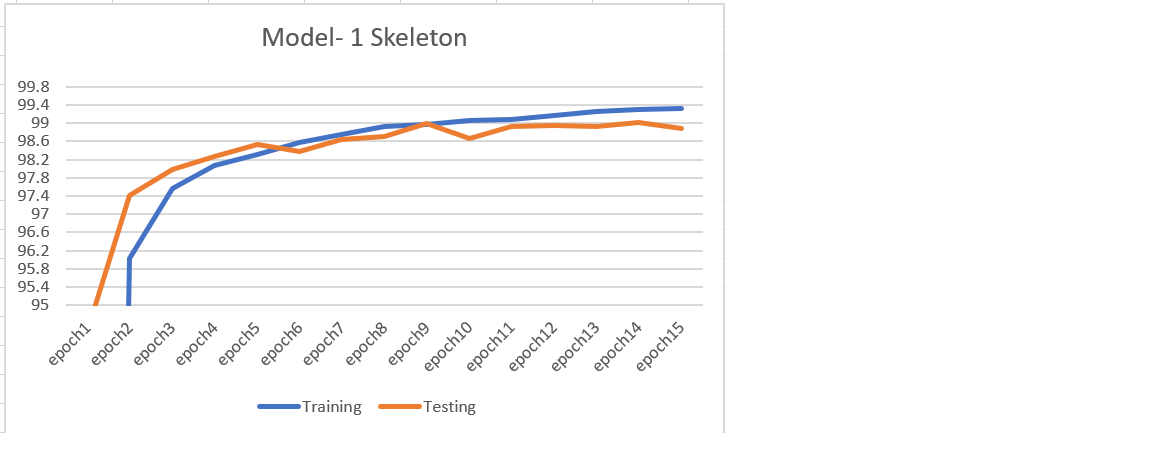

# Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model1

## Data Transformations
We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train data transformations
train_transformer = [transforms.RandomRotation((-7., 7.), fill=0),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),]

# Test Phase transformations
test_transformer = [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Summary

In [3]:
# sending model to device
model = model1().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             144
              ReLU-2           [-1, 16, 28, 28]               0
            Conv2d-3           [-1, 32, 28, 28]           4,608
              ReLU-4           [-1, 32, 28, 28]               0
         MaxPool2d-5           [-1, 32, 14, 14]               0
            Conv2d-6           [-1, 16, 14, 14]             512
              ReLU-7           [-1, 16, 14, 14]               0
            Conv2d-8           [-1, 32, 12, 12]           4,608
              ReLU-9           [-1, 32, 12, 12]               0
           Conv2d-10           [-1, 64, 10, 10]          18,432
             ReLU-11           [-1, 64, 10, 10]               0
           Conv2d-12           [-1, 16, 10, 10]           1,024
             ReLU-13           [-1, 16, 10, 10]               0
           Conv2d-14             [-1, 3

# Model Train Test

In [4]:
model =  model1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.20153294503688812 Batch_id=468 Accuracy=45.28: 100%|██████████| 469/469 [00:21<00:00, 21.88it/s]



Test set: Average loss: 0.1809, Accuracy: 9445/10000 (94.45%)

EPOCH: 1


Loss=0.025632398203015327 Batch_id=468 Accuracy=96.02: 100%|██████████| 469/469 [00:21<00:00, 21.64it/s]



Test set: Average loss: 0.0857, Accuracy: 9740/10000 (97.40%)

EPOCH: 2


Loss=0.09533137828111649 Batch_id=468 Accuracy=97.56: 100%|██████████| 469/469 [00:21<00:00, 22.17it/s]



Test set: Average loss: 0.0603, Accuracy: 9799/10000 (97.99%)

EPOCH: 3


Loss=0.10759862512350082 Batch_id=468 Accuracy=98.08: 100%|██████████| 469/469 [00:21<00:00, 21.48it/s]



Test set: Average loss: 0.0572, Accuracy: 9827/10000 (98.27%)

EPOCH: 4


Loss=0.050557393580675125 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:22<00:00, 20.93it/s]



Test set: Average loss: 0.0442, Accuracy: 9854/10000 (98.54%)

EPOCH: 5


Loss=0.0647435337305069 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:22<00:00, 21.10it/s]



Test set: Average loss: 0.0490, Accuracy: 9838/10000 (98.38%)

EPOCH: 6


Loss=0.04901247099041939 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:23<00:00, 19.87it/s]



Test set: Average loss: 0.0404, Accuracy: 9865/10000 (98.65%)

EPOCH: 7


Loss=0.04247413948178291 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:21<00:00, 21.35it/s]



Test set: Average loss: 0.0403, Accuracy: 9871/10000 (98.71%)

EPOCH: 8


Loss=0.027495920658111572 Batch_id=468 Accuracy=98.96: 100%|██████████| 469/469 [00:21<00:00, 22.09it/s]



Test set: Average loss: 0.0340, Accuracy: 9900/10000 (99.00%)

EPOCH: 9


Loss=0.050678789615631104 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]



Test set: Average loss: 0.0393, Accuracy: 9866/10000 (98.66%)

EPOCH: 10


Loss=0.03706458956003189 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:21<00:00, 21.68it/s]



Test set: Average loss: 0.0350, Accuracy: 9892/10000 (98.92%)

EPOCH: 11


Loss=0.1062675341963768 Batch_id=468 Accuracy=99.16: 100%|██████████| 469/469 [00:22<00:00, 21.03it/s]



Test set: Average loss: 0.0358, Accuracy: 9895/10000 (98.95%)

EPOCH: 12


Loss=0.0010812556138262153 Batch_id=468 Accuracy=99.25: 100%|██████████| 469/469 [00:22<00:00, 20.69it/s]



Test set: Average loss: 0.0384, Accuracy: 9893/10000 (98.93%)

EPOCH: 13


Loss=0.0012857248075306416 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:22<00:00, 20.94it/s]



Test set: Average loss: 0.0339, Accuracy: 9901/10000 (99.01%)

EPOCH: 14


Loss=0.05476582422852516 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:22<00:00, 21.18it/s]



Test set: Average loss: 0.0352, Accuracy: 9888/10000 (98.88%)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


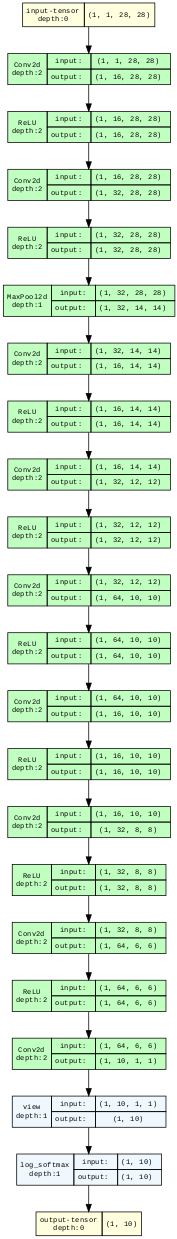

In [5]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model1(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph